In [1]:
# ls
from google.colab import drive
drive.mount("/content/gdrive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


#### Training resnet18 model for 200 epochs with 128 batch size, and saved the best model, in google drive.

The keras python file for building model and training it is located in google colab. which is excuted from colab. We can see the training verbose, below.

In [11]:
!python /content/gdrive/My\ Drive/resnet18_cifar10.py

Using TensorFlow backend.
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)
W0703 12:51:51.818745 139814690822016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:68: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0703 12:51:51.829063 139814690822016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:504: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0703 12:51:51.831433 139814690822016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3875: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0703 12:51:51.864699 139814690822016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:16

#### Loaded cifar10 dataset, into train and test split of 50k and 10k samples respectively.

After that, load the best keras model from the google drive, saved while training above.

In [12]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

Using TensorFlow backend.


In [15]:
from keras.models import load_model
model = load_model('/content/gdrive/My Drive/cifar10_ResNet20v1_model.133.h5')

W0703 15:19:14.974539 139671509055360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:504: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0703 15:19:15.007612 139671509055360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3875: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0703 15:19:15.046157 139671509055360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:235: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0703 15:19:15.048018 139671509055360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:166: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0703 15:19:15.04918

In [16]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 16)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [73]:
import numpy as np
import matplotlib.pyplot as plt

j,t = 0, 0
X_test_wrong = []
X_test_wrong_raw = []
for i in range(len(test_features)):
  img_data = test_features[i].astype('float32')
  img_data /= 255
  img_data = np.expand_dims(img_data, axis=0)
#   img_data = test_features[i].reshape(1, 32, 32,3)
  t += 1
#   print(model.predict(img_data)[0])
#   print(np.argmax(model.predict(img_data)[0]))
#   print(test_labels[i][0])
  if np.argmax(model.predict(img_data)[0]) != test_labels[i][0]:
    X_test_wrong.append((img_data, np.argmax(model.predict(img_data)[0]), test_labels[i][0]))
    X_test_wrong_raw.append((test_features[i], np.argmax(model.predict(img_data)[0]), test_labels[i][0]))
    j += 1
  if j >= 50:
    break
print('totla false preds {} for samples {}'.format(j,t))

totla false preds 50 for samples 342


In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

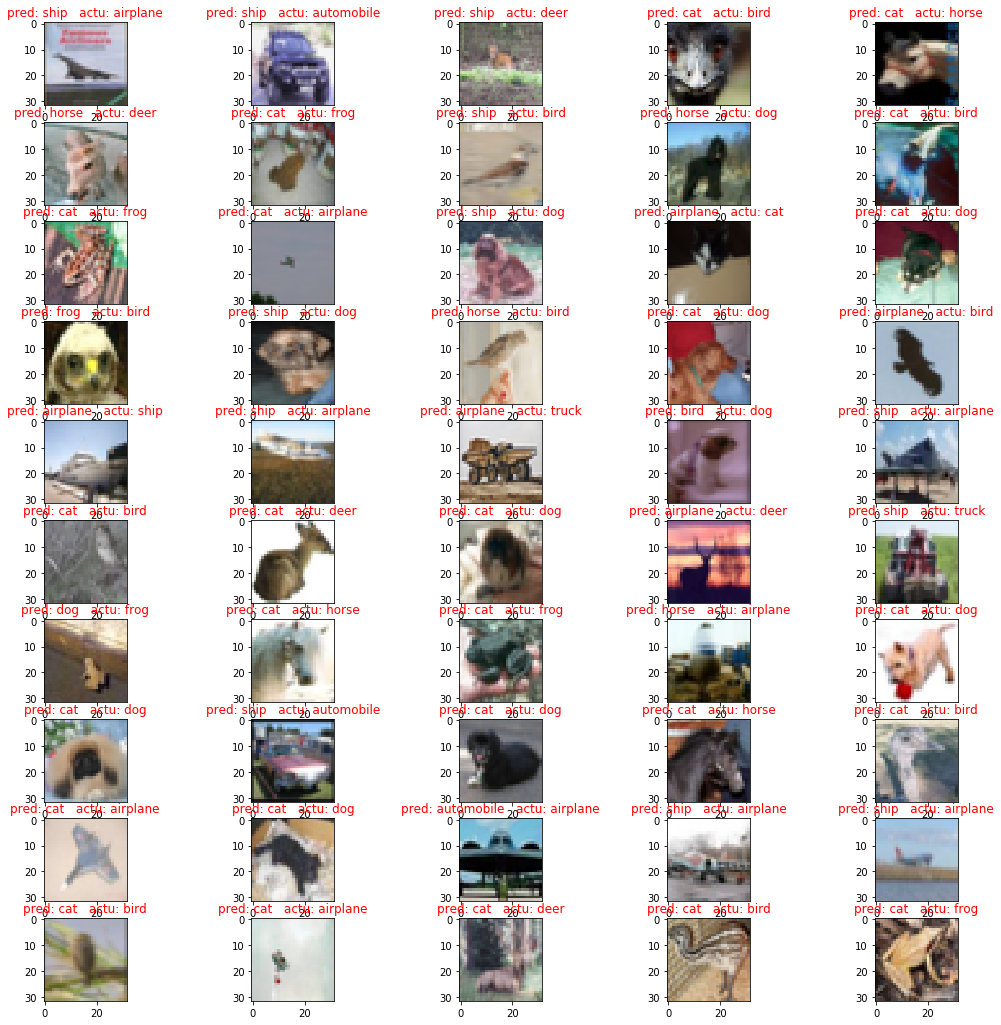

In [79]:
plt.figure(figsize=(18,18))
batch_size = 25
i = 0
for img in X_test_wrong:
  ax = plt.subplot(10,5,i+1)
  ax.set_title("pred: {}   actu: {}".format(class_names[img[1]], class_names[img[2]]), color='r')
  plt.imshow(np.reshape(np.uint8(255 * img[0]), (32,32,-1)), cmap=plt.cm.gray)
  i += 1

In [0]:

%matplotlib inline
import cv2
import keras.backend as K

def grad_CAM(img):
    img = img.astype('float32')
    img /= 255
    x = np.expand_dims(img, axis=0)
#     x = preprocess_input(x)


    preds = model.predict(x)  #model
#     print("no cutout")
    class_idx = np.argmax(preds[0])
    class_output = model.output[:, class_idx]  #moel
    last_conv_layer = model.get_layer("conv2d_21")   # model



    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for i in range(64):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]


    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    img = np.uint8(255 * img)

    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    
    return superimposed_img, preds

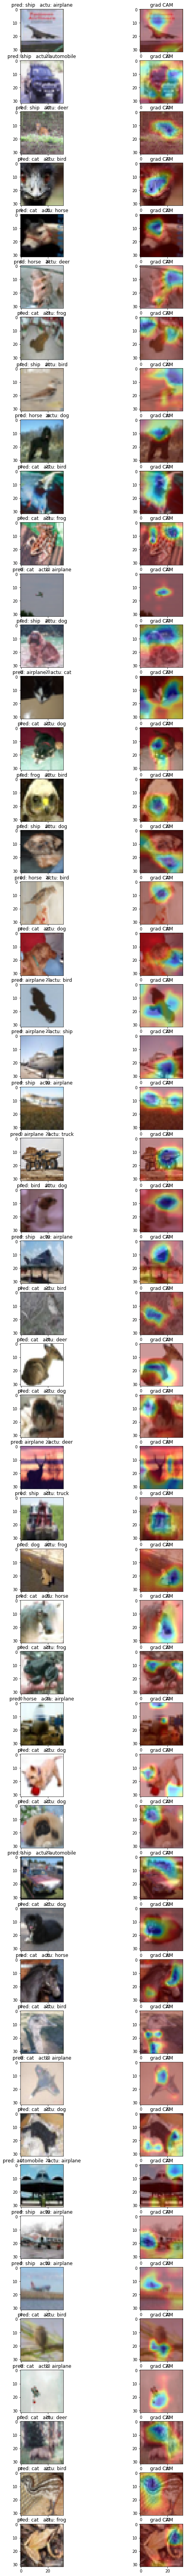

In [84]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
%matplotlib inline
fig, ax = plt.subplots(50,2,figsize=(10, 120))
for k,l in enumerate(X_test_wrong_raw[:]):
  
  superimposed_img, preds = grad_CAM(l[0])
  
  ax[k,0].imshow(l[0])
  ax[k,0].set_title("pred: {}   actu: {}".format(class_names[l[1]], class_names[l[2]]))
  ax[k,1].imshow(superimposed_img)
  ax[k,1].set_title("grad CAM")
  